<center><img src="https://i.ibb.co/K5QHC1s/yandex-music.jpg" width=325px></center>
<p style="font-family: 'JetBrains Mono'; font-weight: bold; font-size: 200%; color: #4A4B52; text-align: center"> An introduction to Yandex Music TOP 100 songs🎵. </p>



<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>About</b> 📙
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    This is a project I started doing because I couldn't find any data from yandex music on kaggle, everywhere else it was just spotify or soundcloud. 
So I present you the data that I scrapped from Yandex music, the top 100 songs for September 21, 2023.</i>
</p>
    

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/yandex-music-top-100-songs/yandex_tracks_top100.csv')

<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>Let's look at our data, try to estimate it, look at missing values, etc.</b> 
</p>

In [3]:
df.head(10)

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1,0,4847753,2120528
1,Плохая Девочка,2:15,https://music.yandex.ru//album/26697445/track/...,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",2,0,16677658,417013
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3,0,4406023,287295
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4,0,5149399,2359899
4,Где прошла ты,2:48,https://music.yandex.ru//album/25163882/track/...,русский рэп,"['Кравц', 'Гио Пика']",5,0,9058111,1509523
5,По весне,2:29,https://music.yandex.ru//album/25385537/track/...,русская поп-музыка,"['Jakone', 'SCIRENA']",6,0,7249592,103349
6,Не вспоминай,2:53,https://music.yandex.ru//album/26238268/track/...,русская поп-музыка,"['NILETTO', 'Олег Майами', 'Лёша Свик']",7,0,9595600,4662989
7,Поспешили,2:06,https://music.yandex.ru//album/27076894/track/...,русский рэп,"['MACAN', 'Jakone']",8,0,9094105,2414815
8,Чёрный Русский,2:20,https://music.yandex.ru//album/27253115/track/...,русский рэп,['MORGENSHTERN'],9,1,2857140,4296461
9,Танцы,2:58,https://music.yandex.ru//album/26499893/track/...,русская поп-музыка,['NLO'],10,0,3332520,243825


Text(50.722222222222214, 0.5, 'Values in dataset')

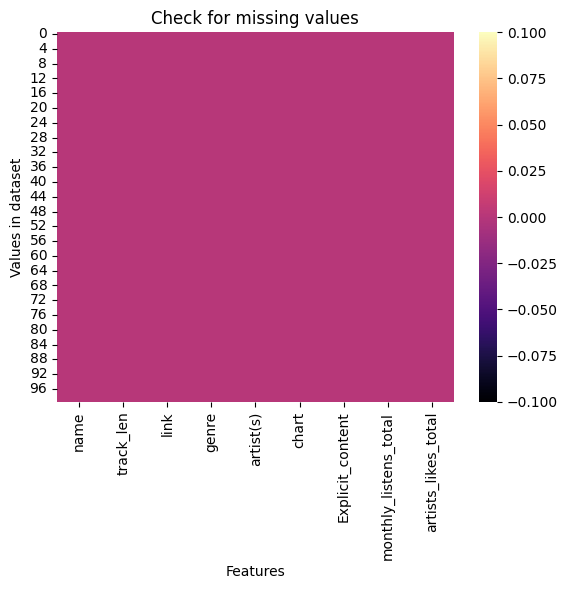

In [4]:
sns.heatmap(df.isnull(), cmap = 'magma')
plt.gca().set_title('Check for missing values')
plt.xlabel('Features')
plt.ylabel('Values in dataset')

In [5]:
df[df['monthly_listens_total'] < 5]

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
43,Космос,3:47,https://music.yandex.ru//album/11999153/track/...,русский рэп,[],44,0,0,0


<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    line 43 has a bunch of missing values. Let me explain why, because this track is in some compilation.</i>
</p>



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   100 non-null    object
 1   track_len              100 non-null    object
 2   link                   100 non-null    object
 3   genre                  100 non-null    object
 4   artist(s)              100 non-null    object
 5   chart                  100 non-null    int64 
 6   Explicit_content       100 non-null    int64 
 7   monthly_listens_total  100 non-null    int64 
 8   artists_likes_total    100 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    let`s convert track_len into seconds.</i>
</p>



In [7]:
def sec_convert(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds
df['track_len'] = df['track_len'].apply(sec_convert)

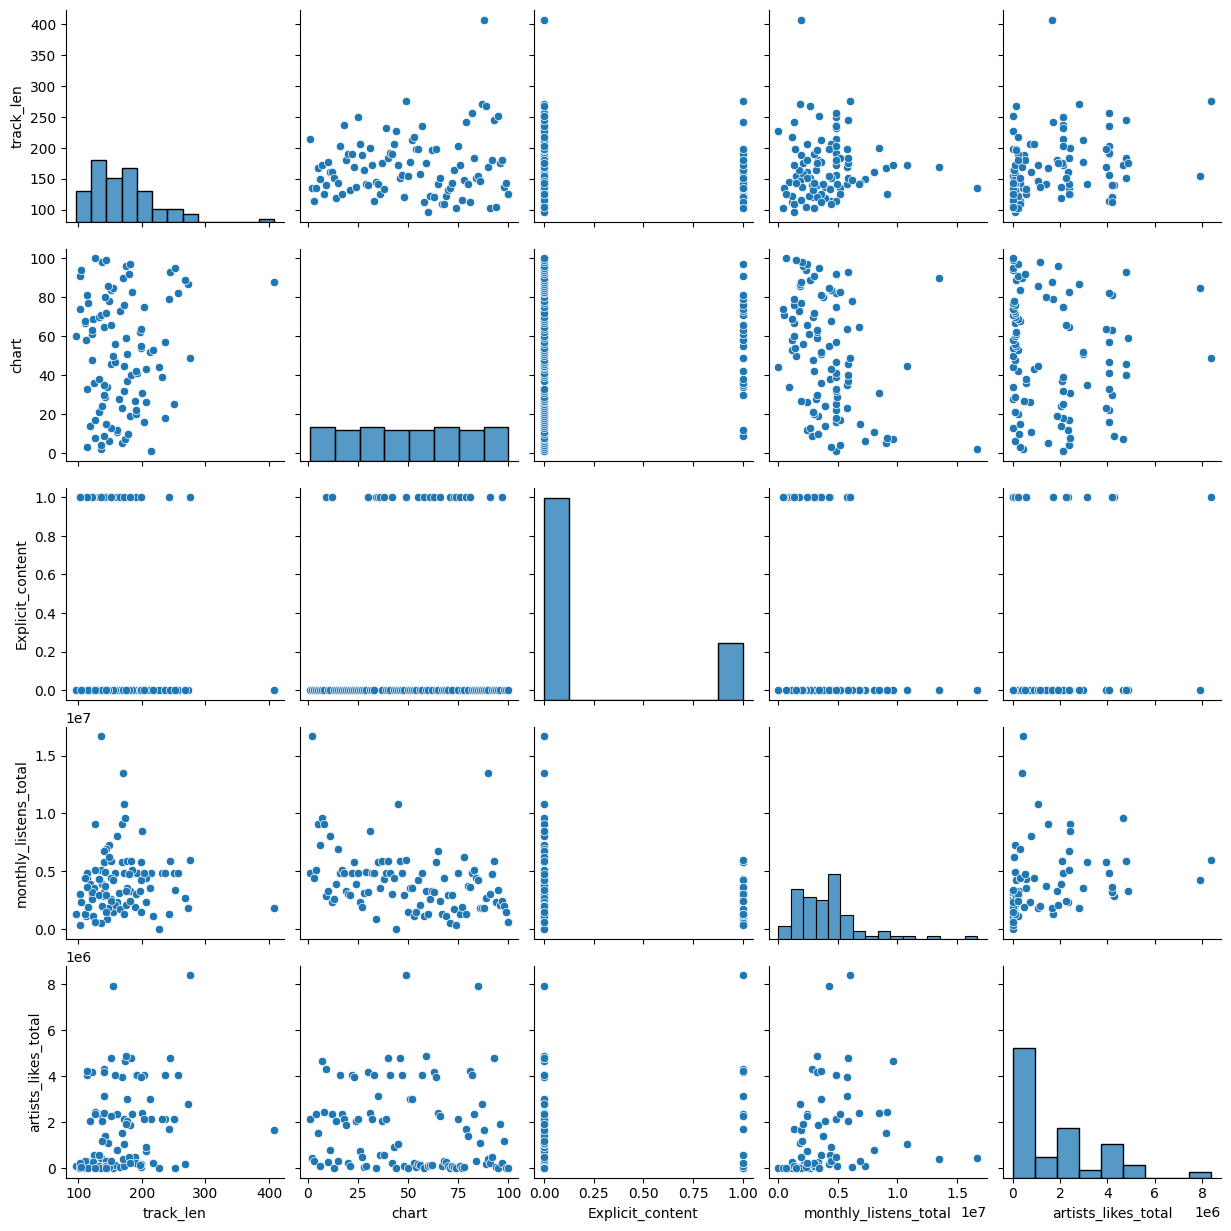

In [8]:
sns.pairplot(df)

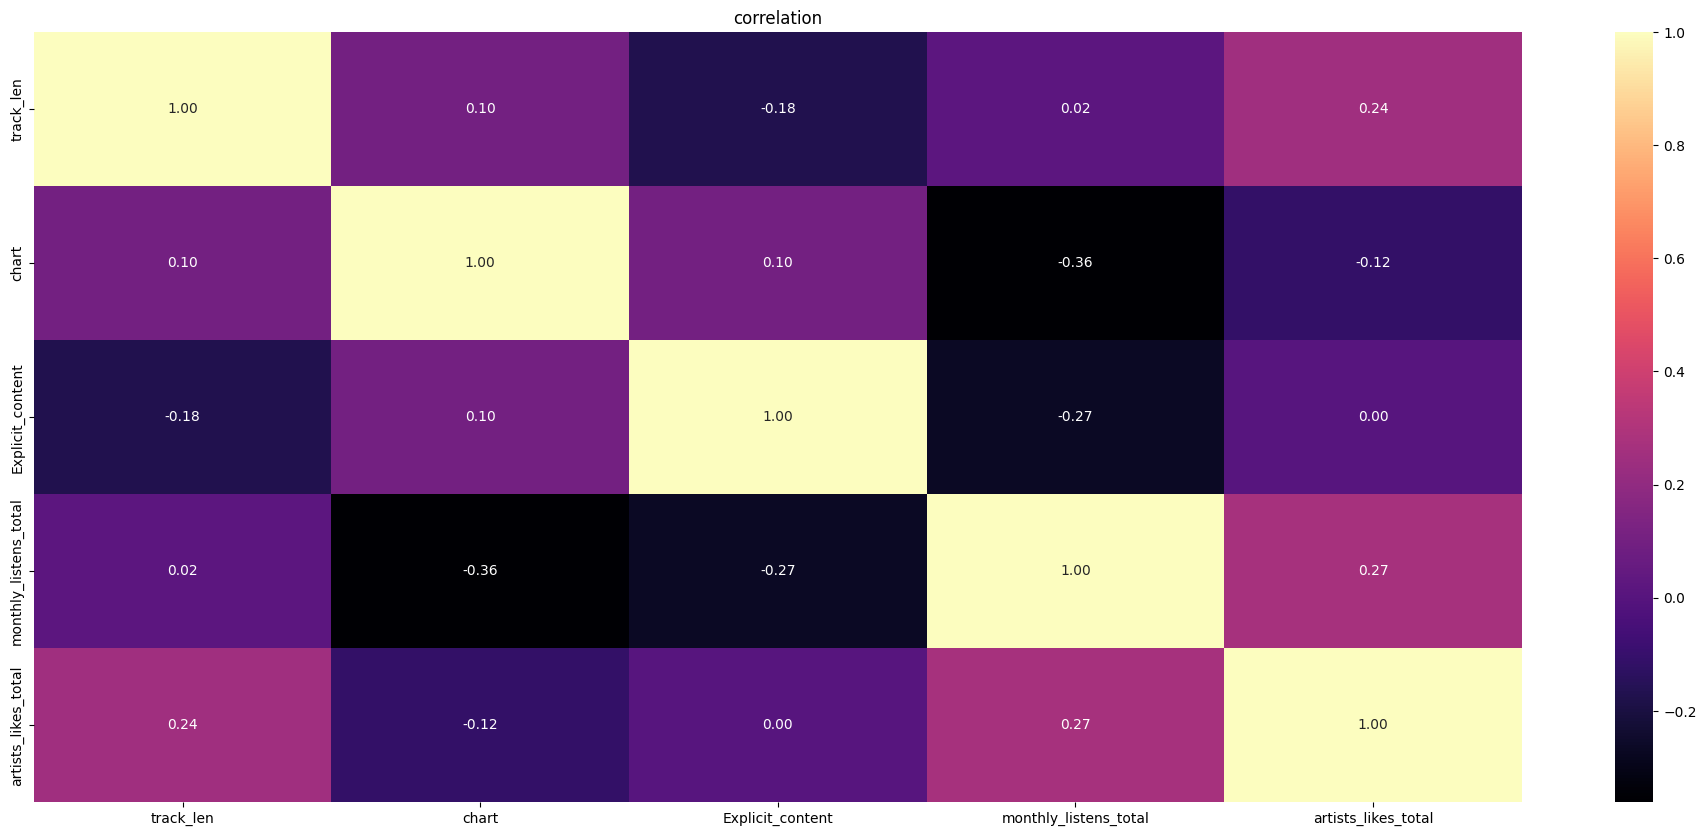

In [9]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('correlation')
plt.show()

<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>Let's analyze the genres of music.</b> 
</p>

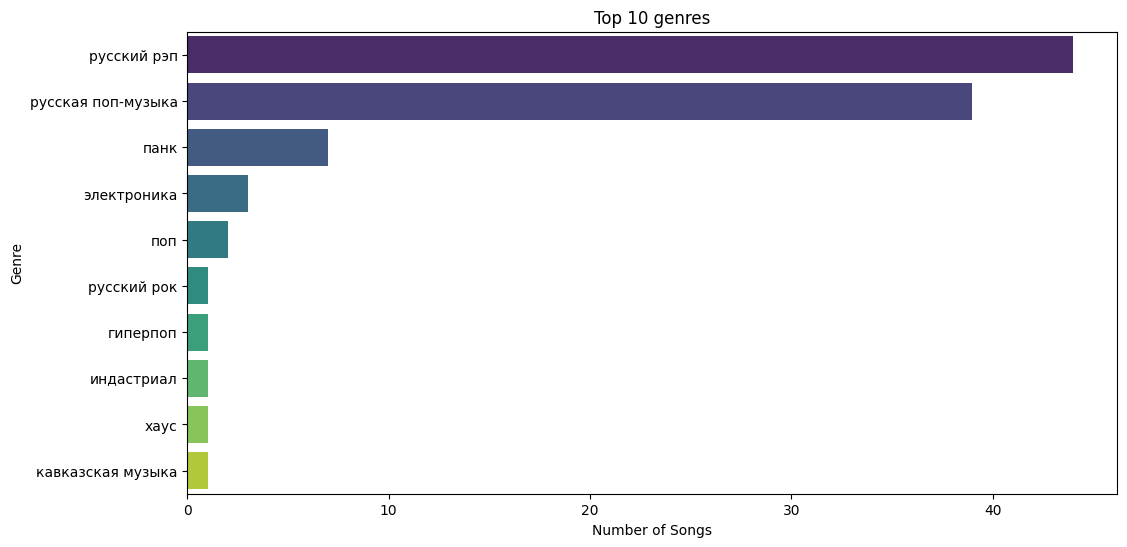

genre
русский рэп           44
русская поп-музыка    39
панк                   7
электроника            3
поп                    2
русский рок            1
гиперпоп               1
индастриал             1
хаус                   1
кавказская музыка      1
Name: count, dtype: int64

In [10]:
top_genre = df['genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genre.values, y=top_genre.index, palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 10 genres')
plt.show()

top_genre

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    What's not surprising is that the Russian rap genre is at the top of the list. And also the fact that pop comes after rap. 
However, the fact that there are 7 tracks of punk genre I find it cool. 
The funny thing is that literally maybe 8-10 years ago absolutely everyone considered the genre of Russian rap to be garbage, and what is going on now?).</i>
</p>



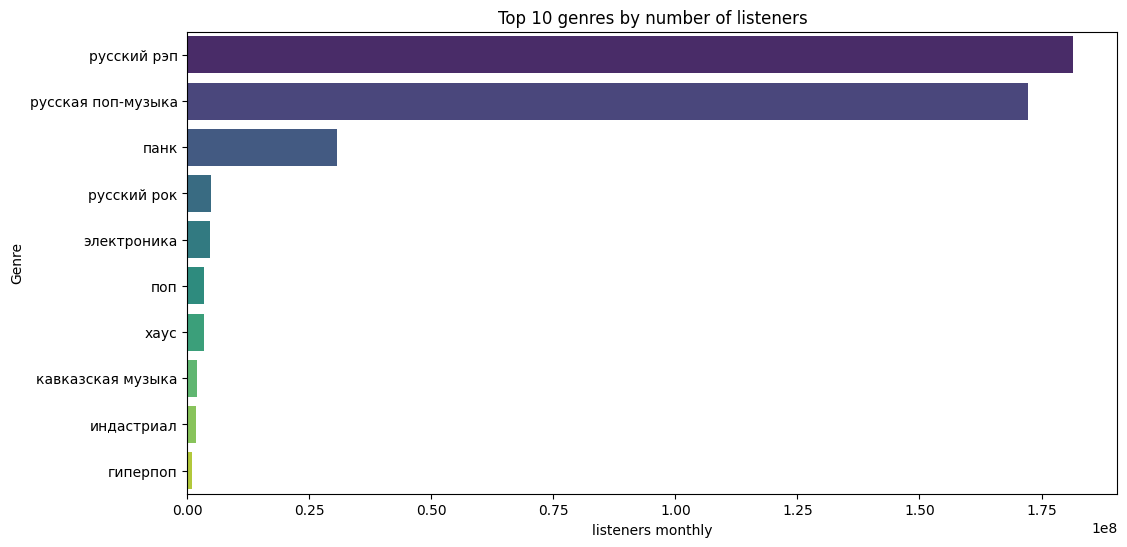

In [11]:
grouped = df.groupby('genre')

agg_functions = {
    'monthly_listens_total': 'sum',
    'artists_likes_total': 'sum'
}

genre_stats = grouped.agg(agg_functions)
genre_listens = genre_stats['monthly_listens_total'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_listens.values, y=genre_listens.index, palette='viridis')
plt.xlabel('listeners monthly')
plt.ylabel('Genre')
plt.title('Top 10 genres by number of listeners')
plt.show()



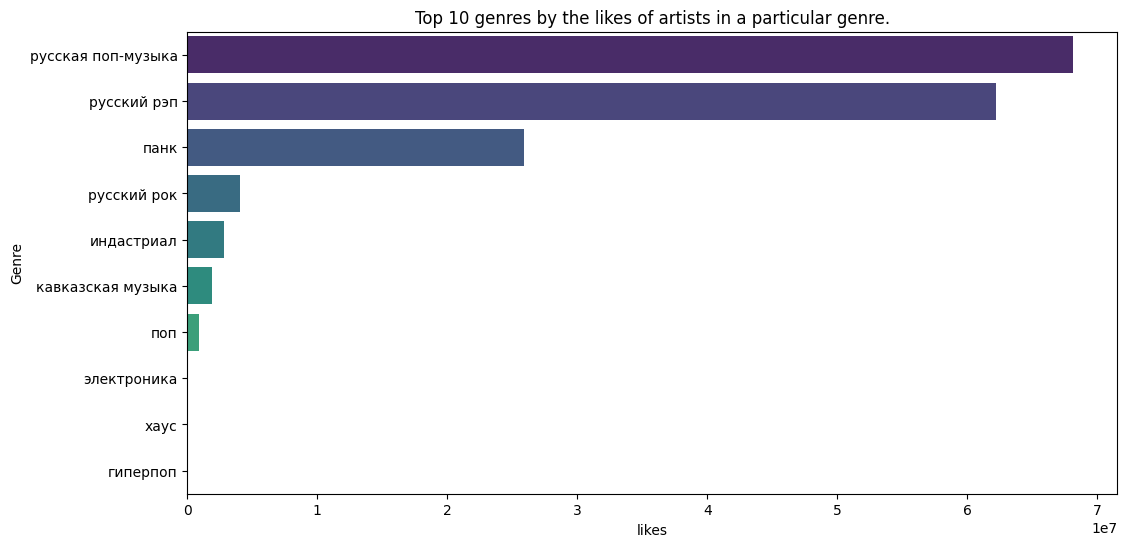

In [12]:
genre_likes = genre_stats['artists_likes_total'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_likes.values, y=genre_likes.index, palette='viridis')
plt.xlabel('likes')
plt.ylabel('Genre')
plt.title('Top 10 genres by the likes of artists in a particular genre.')
plt.show()

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
"> 
    Interesting insight we got here, it turns out that according to a sample of the top 100 songs on the chart listeners are more Russian rap, but the likes are more pop music.</i>
</p>





<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>let's take a look at the most popular songs.</b> 
</p>

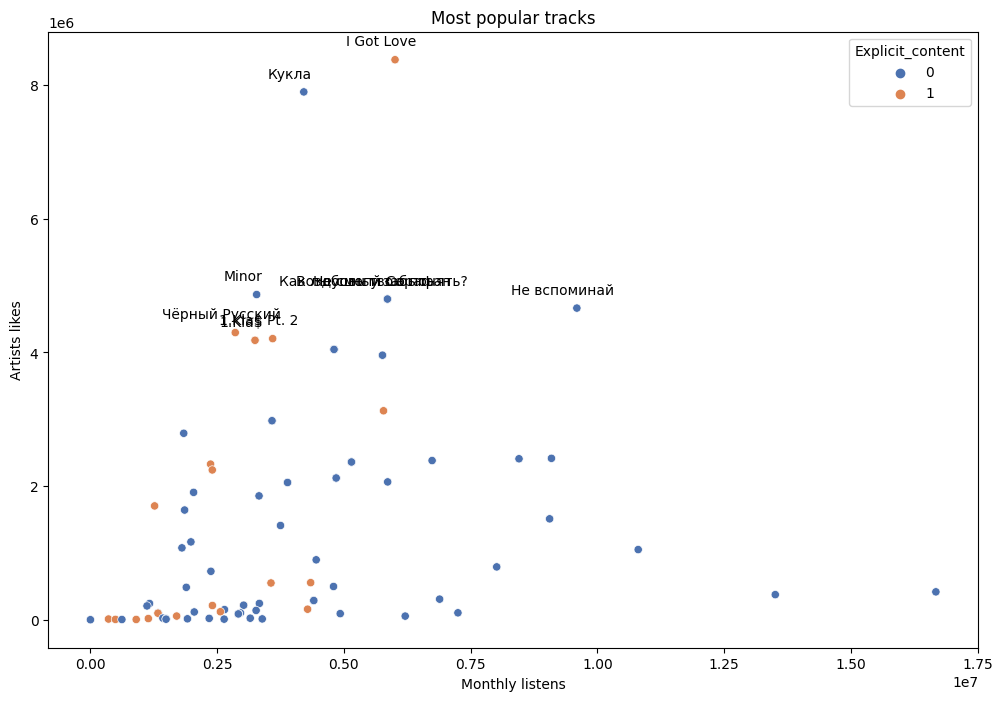

In [40]:
df_sorted = df.sort_values(by='artists_likes_total', ascending=False)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_sorted, x='monthly_listens_total', y='artists_likes_total', hue='Explicit_content', palette="deep")

for i, row in df_sorted.head(10).iterrows():  # taking first 10 songs
    plt.annotate(row['name'], (row['monthly_listens_total'], row['artists_likes_total']),
                 fontsize=10, xytext=(-10, 10), textcoords='offset points', ha='center')

plt.xlabel('Monthly listens')
plt.ylabel('Artists likes')
plt.title('Most popular tracks')


plt.show()

<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>This is where my notebook comes to an end, however this is only a small part of what can be explored using this data...</b> 
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    I hope my introduction to my new dataset will interest you to poke around the data yourself. Maybe you will find some interesting insights or you are just a person who loves and is interested in music. 
Either way, thanks for exploring my notebook! 
Good luck on the Kaggle site!</i>
</p>
